# データセットの用意

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
import japanize_matplotlib
import pandas as pd
sns.set
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))


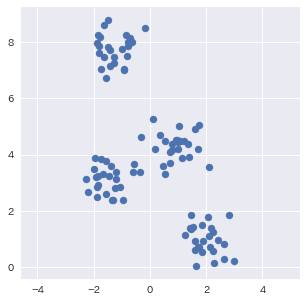

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], marker='o', s=50)

plt.axis('equal')
plt.show()

# kemeansクラス用意

In [64]:
class ScratchKmeans():
    
    #パラメータの定義
    
    #アトリビュート
    #SSE_LIST 
    def __init__(self, k,data):
        self.k = k
        self.max_iter = 300
        self.centroids  = np.zeros(self.k)
        self.pred = np.full(len(data), None)
        self.SSE_LIST = []
        
    def fit(self, data):
        y = np.full(data.shape[0], None)

        count = 0
        label_list = np.unique(range(self.k))
        #重心の初期値のインデックス。（ランダムに４つ選ぶ）
        centroid_index = np.random.choice(data.shape[0], self.k, replace=False)
        # 重心の初期の座標
        centroids = data[centroid_index]
        while(count <self.max_iter):
            for i in range(len(y)):
                #numpy配列のインデックスは０から始まるので-1
                v = data[i]    
                min_norm=10**10
                
                for k,cent in enumerate (centroids):
                    norm = np.linalg.norm(cent - v)
                    #それまでの距離より小さかったら更新
                    if min_norm  > norm:
                        min_k = k
                        y[i] = min_k
                        #距離が最小の値を更新
                        min_norm = norm  
                        
            
                        
            for label in label_list:
                #ラベルのインデックスを取得
                index = np.where(y==label)
                #取得したインデックスをXに対応する形でスライス
                #それx,y軸それぞれを合計を計算
                x_sum = data[index,0].sum()
                y_sum = data[index,1].sum()
                #各ラベルの要素数を取得
                num = data[index,0].shape[1]   
                #x,y座標それぞれの重心を算出
                x_c = x_sum / num 
                y_c = y_sum/ num
                #重心の座標が変わっていなかったら処理をやめる
                if centroids[label]  == np.array([x_c, y_c]):
                    break
                #重心の座標を更新
                centroids[label] =np.array([x_c, y_c])
                
            count +=1
        return y,centroids

    def calc_sse(self, X):
        count = 0
       
        #k回SSEを計算する
        while( count <= 10):

            for k  in range(1, 11):
                pred ,centroids = fit(X,k)   
                #結合できるようにリシェイプ
                pred = np.reshape(pred,(X.shape[0],1))
                #結合して変数に格納
                combined = np.hstack((pred,X)).astype(float)
                #SSEの初期化
                SSE = 0
            #各k番目のSSEを計算
            #各クラスターごとの中心点との２乗の誤差を足しあげる
                for cluster in range(k):
                    SSE += sum((combined[combined [:,0]==cluster][:,1] - centroids[cluster,0])**2 + (combined [combined[:,0]==cluster][:,2] - centroids[cluster,1])**2)
            #k番目のSSEを格納
                self.SSE_LIST.append(SSE)
                
                count +=1
        #sseが最小の場合を返す
        return min(self.SSE_LIST)
    
    
    def show_elbow(self):
        left = range(1,k)
        plt.title('エルボー図')
        plt.ylabel('SSE')
        plt.xlabel('クラスタ数')
        plt.plot(left, self.SSE_LIST)

In [65]:
km = ScratchKmeans(k =4,data=X)

In [66]:
km.calc_sse(X)

(27.94409389432265,)